In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

In [2]:
iris = datasets.load_iris()
x = iris.data[:, :2]  # sepal width and sepal length
y = iris.target  # classes (die Blumen halt)

backround = ListedColormap(['#FFAAAA', '#AAFFAA', '#00AAFF'])
training_points = ListedColormap(['#a30b0b', '#089e08', '#006ea6'])

test_size = 0.1  # (90-10)
neurons = [1, 3, 5] # numbers of neutrons in the hidden layer
interations = 10000
learning_rate = 0.1
random_state = 40
# solver

solver = "lbfgs" # standard is adam, but that is only for big datasets, more than 1000 or so?
steps= 0.002

In [3]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=random_state)

In [4]:
# normalize the data
scaler = StandardScaler()
temp = scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

Classifier predict: [0 1 1 2 1 1 2 1 1 0 1 0 0 2 1]
neurones: 1, Accuracy: 80.0 %


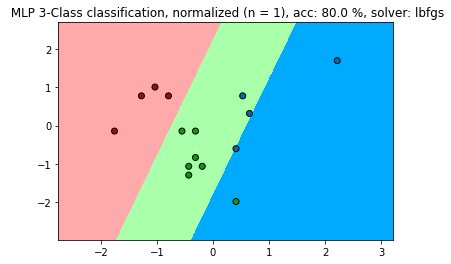

Classifier predict: [0 1 2 2 1 2 1 1 1 0 1 0 0 1 1]
neurones: 3, Accuracy: 93.33 %


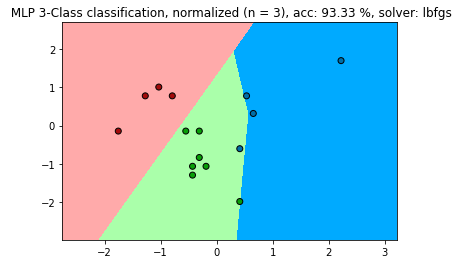

Classifier predict: [0 1 2 2 1 2 1 1 1 0 1 0 0 1 1]
neurones: 5, Accuracy: 93.33 %


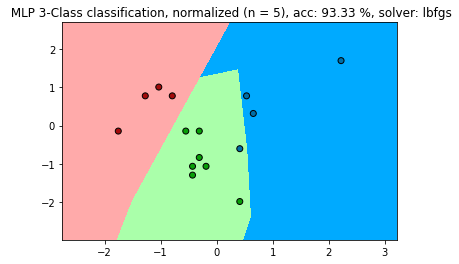

In [6]:
for f in neurons:
    classifier = MLPClassifier(solver=solver, max_iter=interations, hidden_layer_sizes=f, learning_rate_init=learning_rate, random_state=random_state).fit(x_train, y_train)

    print(f"Classifier predict: {classifier.predict(x_test)}")
    print(f"neurones: {f}, Accuracy: {round(classifier.score(x_test, y_test) * 100,2)} %")

    # calculate min, max and limits
    x_min, x_max = x_test[:, 0].min() - 1, x_test[:, 0].max() + 1
    y_min, y_max = x_test[:, 1].min() - 1, x_test[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, steps),
                         np.arange(y_min, y_max, steps))

    # Put the result into a color plot
    pred = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    pred = pred.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, pred, cmap=backround, shading='auto')

    # Plot also the training points
    plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test, cmap=training_points, edgecolors='#000000')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    plt.title(f" MLP 3-Class classification, normalized (n = {f}), acc: {round(classifier.score(x_test, y_test) * 100, 2)} %, solver: {solver}")
    plt.show()